In [ ]:
!pip install -q plotly pyvis pycirclize nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import display, HTML
from google.colab import files
import plotly.express as px
from pycirclize import Circos
import seaborn as sns
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

# Helper functioons

a helper function that helps retrieve two nodes name that correlation was calculated for.

Class distributions

In [ ]:
def given_name2orginal_name(name):
  name = name.split("_")[1]
  name = int(name)
  original_names = "Mean_1  	Mean_3  	Mean_4  	Mean_6  	Mean_7  	Mean_8  	Mean_9  	Mean_11  	Mean_12  	Mean_13  	Mean_14  	Mean_15  	Mean_16  	Mean_17  	Mean_18  	Mean_19  	Mean_20  	Mean_21  	Mean_23  	Mean_24  	Mean_25  	Mean_26  	Mean_27  	Mean_28  	Mean_29  	Mean_30  	Mean_31  	Mean_32  	Mean_33  	Mean_34  	Mean_35  	Mean_36  	Mean_37  	Mean_38  	Mean_39  	Mean_41  	Mean_42  	Mean_43  	Mean_44  	Mean_45  	Mean_46  	Mean_47  	Mean_48  	Mean_50  	Mean_51  	Mean_52  	Mean_53  	Mean_54  	Mean_55  	Mean_56  	Mean_57  	Mean_58  	Mean_59  	Mean_60  	Mean_61  	Mean_62  	Mean_63  	Mean_64  	Mean_65  	Mean_67  	Mean_68  	Mean_69  	Mean_70  	Mean_71  	Mean_72  	Mean_73  	Mean_74  	Mean_75  	Mean_77  	Mean_78  	Mean_79  	Mean_80  	Mean_81  	Mean_82  	Mean_83  	Mean_84  	Mean_85  	Mean_86  	Mean_87  	Mean_88  	Mean_89  	Mean_90  	Mean_91  	Mean_93  	Mean_94  	Mean_95  	Mean_96  	Mean_97  	Mean_98  	Mean_100  	Mean_101  	Mean_102  	Mean_103  	Mean_104  	Mean_105  	Mean_106  	Mean_107  	Mean_108  	Mean_109  	Mean_110  	Mean_111  	Mean_112  	Mean_113  	Mean_114  	Mean_115  	Mean_117  	Mean_118  	Mean_119  	Mean_120  	Mean_121  	Mean_122  	Mean_123  	Mean_124  	Mean_125  	Mean_126  	Mean_127  	Mean_128  	Mean_129  	Mean_130  	Mean_131  	Mean_132  	Mean_133  	Mean_134  	Mean_135  	Mean_136  	Mean_137  	Mean_138  	Mean_140  	Mean_141  	Mean_142  	Mean_144  	Mean_145  	Mean_146  	Mean_147  	Mean_148  	Mean_149  	Mean_150  	Mean_151  	Mean_152  	Mean_153  	Mean_154  	Mean_155  	Mean_156  	Mean_157  	Mean_158  	Mean_159  	Mean_160  	Mean_161  	Mean_162  	Mean_163  	Mean_164  	Mean_165  	Mean_166  	Mean_167  	Mean_168  	Mean_169  	Mean_170  	Mean_172  	Mean_173  	Mean_174  	Mean_176  	Mean_177  	Mean_178  	Mean_179  	Mean_180  	Mean_181  	Mean_182  	Mean_183  	Mean_184  	Mean_185  	Mean_186  	Mean_187  	Mean_188  	Mean_189  	Mean_190  	Mean_191  	Mean_192  	Mean_194  	Mean_195  	Mean_196  	Mean_197  	Mean_198  	Mean_199  	Mean_200  	Mean_201  	Mean_202  	Mean_204  	Mean_205  	Mean_206  	Mean_207  	Mean_208  	Mean_209  	Mean_210  	Mean_211  	Mean_212  	Mean_213  	Mean_214  	Mean_215  	Mean_217  	Mean_218  	Mean_219  	Mean_220  	Mean_221  	Mean_222  	Mean_223  	Mean_224  	Mean_225  	Mean_226  	Mean_227  	Mean_228  	Mean_230  	Mean_231  	Mean_232  	Mean_233  	Mean_234  	Mean_235  	Mean_236  	Mean_238  	Mean_239  	Mean_240  	Mean_241  	Mean_243  	Mean_244  	Mean_245  	Mean_246  	Mean_247  	Mean_248  	Mean_249  	Mean_250  	Mean_251  	Mean_252  	Mean_253  	Mean_254  	Mean_255  	Mean_257  	Mean_258  	Mean_259  	Mean_261  	Mean_262  	Mean_263  	Mean_264  	Mean_265  	Mean_266  	Mean_267  	Mean_268  	Mean_269  	Mean_272  	Mean_273  	Mean_274  	Mean_275  	Mean_276  	Mean_277  	Mean_278  	Mean_279  	Mean_280  	Mean_281  	Mean_282  	Mean_283  	Mean_284  	Mean_285  	Mean_287  	Mean_291  	Mean_292  	Mean_293  	Mean_294  	Mean_295  	Mean_296  	Mean_297  	Mean_298  	Mean_299  	Mean_300  	Mean_301  	Mean_302  	Mean_303  	Mean_304  	Mean_305  	Mean_306  	Mean_307  	Mean_308  	Mean_309  	Mean_310  	Mean_311  	Mean_312  	Mean_313  	Mean_314  	Mean_316  	Mean_317  	Mean_318  	Mean_319  	Mean_321  	Mean_323  	Mean_325  	Mean_326  	Mean_327  	Mean_328  	Mean_330  	Mean_331  	Mean_332  	Mean_333  	Mean_334  	Mean_335  	Mean_336  	Mean_337  	Mean_339  	Mean_340  	Mean_341  	Mean_345  	Mean_346  	Mean_347  	Mean_348  	Mean_351  	Mean_352  	Mean_353  	Mean_354  	Mean_355  	Mean_356  	Mean_358  	Mean_359  	Mean_361  	Mean_362  	Mean_363  	Mean_364  	Mean_366  	Mean_367  	Mean_369  	Mean_370  	Mean_371  	Mean_373  	Mean_376  	Mean_377  	Mean_378  	Mean_379  	Mean_380  	Mean_383  	Mean_384  	Mean_385  	Mean_386  	Mean_387  	Mean_388  	Mean_389  	Mean_390  	Mean_391  	Mean_392  	Mean_393  	Mean_394  	Mean_395  	Mean_396  	Mean_397  	Mean_398  	Mean_399  	Mean_400"
  original_names = original_names.split()
  i_indecies, j_indecies = np.triu_indices(351, k=1)
  i_index = i_indecies[name]
  j_index = j_indecies[name]
  return original_names[i_index], original_names[j_index]
given_name2orginal_name("Value_0")

('Mean_1', 'Mean_3')

a helper function that helps retrieve Adjacency Matric from upper triangle values saved in the dataset.

In [ ]:
def UpperTriangleValues2AdjacencyMatrix(upper_triangle_values):
    # Calculate the size of the adjacency matrix
    n = 351

    # Create a zero-filled matrix
    adjacency_matrix = np.zeros((n, n))

    # Fill the upper triangle of the adjacency matrix
    triu_indices = np.triu_indices(n, k=1)
    adjacency_matrix[triu_indices] = upper_triangle_values

    # Mirror the upper triangle to fill the lower triangle
    adjacency_matrix += adjacency_matrix.T
    return adjacency_matrix

# PearsonR *EDA*

## I want to determine of there are any discirminative correlations between two nodes that determine of a person has ADHD or no. Essentially, I am looking for the pearson correlations which are high in people with ADHD and are low for others.

load data and convert dianosise to binary, whether applicant has ADHD or not

In [ ]:
chunk_size = 10000
chunks = pd.read_csv("/content/drive/MyDrive/DM_project2/full_wavelet.csv", chunksize=chunk_size)
df_pearsonr = pd.concat(chunks, ignore_index=True)
df_pearsonr["DX Binary"] = df_pearsonr["DX"].apply(lambda x: 0 if x==0 else 1)
value_columns = [col for col in df_pearsonr.columns if col.startswith('Value_')]

In [ ]:
# Identify highly correlated nodes
high_correlation_threshold = 0.7
high_correlation_columns = [col for col in value_columns if df_pearsonr[col].abs().mean() > high_correlation_threshold]

#divide records into their classes
df_1 = df_pearsonr[df_pearsonr['DX Binary'] == 1]
df_0 = df_pearsonr[df_pearsonr['DX Binary'] == 0]

#Compute the mean of each Value_i column for each group.
means_1 = df_1[high_correlation_columns].mean()
means_0 = df_0[high_correlation_columns].mean()
significant_columns=[]

for col in high_correlation_columns:
    if means_1[col] > means_0[col]:
      t_stat, p_value = ttest_ind(df_1[col].dropna(), df_0[col].dropna())
      if p_value < 0.05:
          significant_columns.append(col)

print("Significant columns with higher mean for DX Binary = 1:")
print(significant_columns)

Significant columns with higher mean for DX Binary = 1:
['Value_2634', 'Value_3038', 'Value_4163', 'Value_4321', 'Value_5565', 'Value_6813', 'Value_7900', 'Value_8104', 'Value_8741', 'Value_9744', 'Value_9904', 'Value_10094', 'Value_12965', 'Value_13196', 'Value_13862', 'Value_13996', 'Value_21794', 'Value_26167', 'Value_26868', 'Value_26914', 'Value_28362', 'Value_28624', 'Value_31956', 'Value_32528', 'Value_32739', 'Value_36606', 'Value_37329', 'Value_37544', 'Value_38155', 'Value_41000', 'Value_41767', 'Value_42218', 'Value_42813', 'Value_43085', 'Value_47190', 'Value_49567', 'Value_50523', 'Value_56105', 'Value_58605', 'Value_61295']


Plot graph of disciminitive correlations, plot is generated in .html file it will be downloaded automatically open it in your browser.

In [ ]:
# List of edges
edges = [given_name2orginal_name(name) for name in significant_columns]
nodes_with_edges = set([node for edge in edges for node in edge])

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes_with_edges)

# Add edges to the graph
G.add_edges_from(edges)
# Create a graph object using NetworkX
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Create a pyvis Network object
net = Network()

# Load the NetworkX graph into pyvis
net.from_nx(G)
#  Customize the appearance (optional)
net.set_options("""
var options = {
  "nodes": {
    "shape": "dot",
    "size": 20,
    "font": {
      "size": 15,
      "color": "black"
    },
    "borderWidth": 2
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "physics": {
    "enabled": true,
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    },
    "maxVelocity": 50,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {
      "enabled": true,
      "iterations": 200
    }
  }
}
""")

# Save the network to an HTML file
net.save_graph('network.html')
files.download('network.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

here I plot the

In [ ]:
sample = df_pearsonr[value_columns].sample(1)
# remove the insignificant edges
sample.apply(lambda x: x if x.name in significant_columns else 0)
adj_mat = sample.to_numpy()[0]

Value_0        0
Value_1        0
Value_2        0
Value_3        0
Value_4        0
              ..
Value_61420    0
Value_61421    0
Value_61422    0
Value_61423    0
Value_61424    0
Length: 61425, dtype: object

In [ ]:
!tar -xvzf /content/drive/MyDrive/DM_project2/ADHD200_parcellations.tar.gz

./._ADHD200_parcellate_200.nii.gz
ADHD200_parcellate_200.nii.gz
./._ADHD200_parcellate_400.nii.gz
ADHD200_parcellate_400.nii.gz


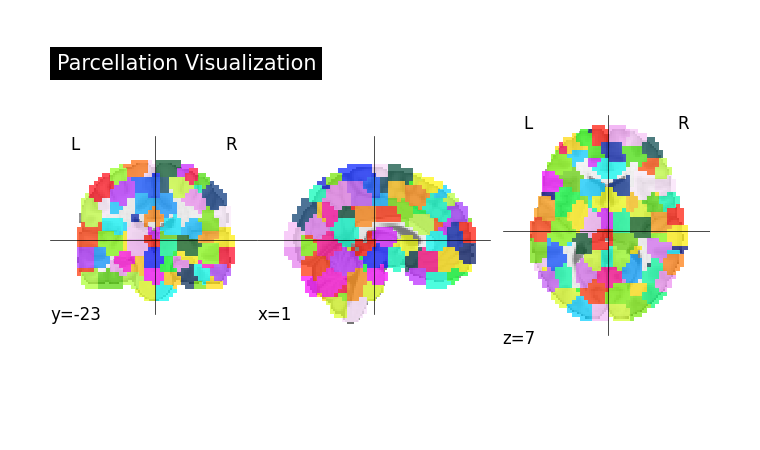

In [ ]:
# Visualize the parcellation
plotting.plot_roi('/content/ADHD200_parcellate_400.nii.gz', title='Parcellation Visualization')
plotting.show()

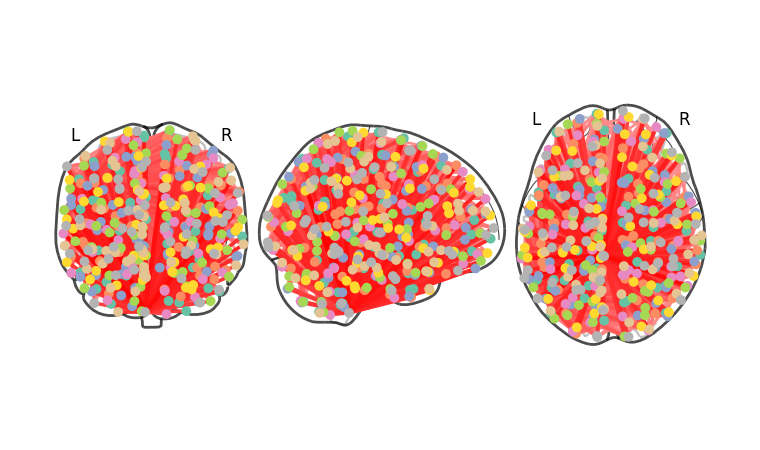

In [ ]:
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

# Calculate the center of mass for each label
coords = plotting.find_parcellation_cut_coords('/content/ADHD200_parcellate_400.nii.gz')
# Plot the functional connectome
plotting.plot_connectome(adj_mat, coords, edge_threshold=50)
plotting.show()

# wavelet EDA

In [ ]:
chunk_size = 1000
chunks = pd.read_csv("/content/drive/MyDrive/DM_project2/full_wavelet.csv", chunksize=chunk_size)
df_wavelet = pd.concat(chunks, ignore_index=True)
df_wavelet["DX Binary"] = df_wavelet["DX"].apply(lambda x: 0 if x==0 else 1)
value_columns = [col for col in df_wavelet.columns if col.startswith('Value_')]

In [ ]:
df_wavelet.head()

,File,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,...,Value_61417,Value_61418,Value_61419,Value_61420,Value_61421,Value_61422,Value_61423,Value_61424,ScanDir ID,DX
0,folders/NYU/1740607/sfnwmrda1740607_session_1_...,2.774678,3.718464,5.987111,2.511326,3.523265,2.662142,4.391625,3.726487,2.932625,...,2.339837,2.520672,2.452930,1.993041,2.328084,1.536852,1.499974,1.212208,1740607,3
1,folders/NYU/1740607/sfnwmrda1740607_session_1_...,2.766205,3.444659,10.094966,2.581205,2.783613,2.961165,2.814599,4.086658,2.544485,...,2.251954,2.378005,2.428965,1.809720,1.726060,2.043155,1.879066,1.172430,1740607,3
2,folders/NYU/1875084/sfnwmrda1875084_session_1_...,5.155818,4.896858,6.486594,4.728215,5.440286,4.510684,7.412804,5.496816,5.680529,...,3.936026,3.784119,3.412516,2.504528,1.613991,3.197856,3.069114,2.021933,1875084,0
3,folders/NYU/0010002/sfnwmrda0010002_session_1_...,2.102123,2.093712,7.011129,1.945714,2.732223,2.206654,6.462724,3.242094,2.003814,...,4.692826,5.161369,2.195389,1.966975,1.222543,2.258624,1.956190,1.331347,10002,3
4,folders/NYU/0010002/sfnwmrda0010002_session_1_...,2.312755,1.754483,5.489136,1.896930,2.197617,2.305537,3.188668,2.751669,2.319816,...,2.005972,1.968583,1.697871,1.455124,0.916145,2.122694,1.569939,1.113700,10002,3


In [ ]:
df_1 = df_wavelet[df_wavelet['DX Binary'] == 1]
df_0 = df_wavelet[df_wavelet['DX Binary'] == 0]

In [ ]:
adj_1 = UpperTriangleValues2AdjacencyMatrix(
    df_1[value_columns].mean().values
    )
px.imshow(adj_1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
adj_0 = UpperTriangleValues2AdjacencyMatrix(
    df_0[value_columns].mean().values
    )
px.imshow(adj_0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Compute the mean of each Value_i column for each group.
means_1 = df_1[value_columns].mean()
means_0 = df_0[value_columns].mean()
significant_columns=[]
diff = []
for col in value_columns:
    if means_1[col] > means_0[col]:
      t_stat, p_value = ttest_ind(df_1[col].dropna(), df_0[col].dropna())
      if p_value < 0.05:
          diff.append(means_1[col]-means_0[col])
          significant_columns.append(col)

print("Significant columns with higher mean")
print(significant_columns)

Significant columns with higher mean
['Value_16196', 'Value_43201', 'Value_58409']


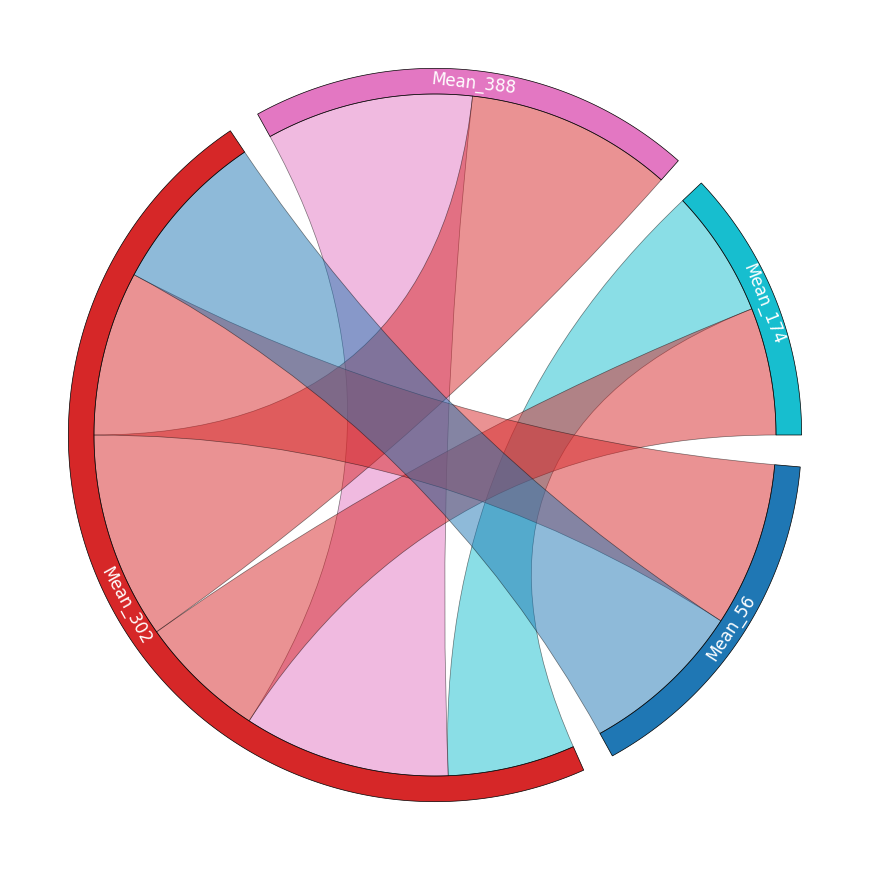

In [ ]:
# Extract pairs from significant columns
# List of edges

edges = [given_name2orginal_name(name) for name in significant_columns]
nodes_with_edges = set([node for edge in edges for node in edge])
nodes = list(nodes_with_edges)
matrix_df = pd.DataFrame(0, index=nodes, columns=nodes)

# Fill the matrix with edge data
for i, edge in enumerate(edges):
    node1, node2 = edge
    matrix_df.at[node1, node2] += diff[i]
    matrix_df.at[node2, node1] += diff[i]  # If undirected

# Initialize Circos plot from the matrix
circos = Circos.initialize_from_matrix(
    matrix_df,
    start=-265,
    end=95,
    space=5,
    r_lim=(93, 100),
    cmap="tab10",
    label_kws=dict(r=94, size=12, color="white"),
    link_kws=dict(ec="black", lw=0.5),
)

# Plot the Circos plot
fig = circos.plotfig()
plt.show()

# Educian *EDA*

In [ ]:
chunk_size = 1000
chunks = pd.read_csv("/content/drive/MyDrive/DM_project2/full_educian.csv", chunksize=chunk_size)
df_educian = pd.concat(chunks, ignore_index=True)
df_educian["DX Binary"] = df_educian["DX"].apply(lambda x: 0 if x==0 else 1)
value_columns = [col for col in df_educian.columns if col.startswith('Value_')]

In [ ]:
df_educian.head()

,File,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,...,Value_61418,Value_61419,Value_61420,Value_61421,Value_61422,Value_61423,Value_61424,ScanDir ID,DX,DX Binary
0,folders/KKI/1996183/sfnwmrda1996183_session_1_...,31.184757,14.935480,55.994568,16.513067,28.069014,18.810900,34.752785,20.418941,20.911995,...,21.857113,17.003258,16.358067,11.705978,19.564602,13.405479,13.871803,1996183,3,1
1,folders/KKI/2104012/sfnwmrda2104012_session_1_...,32.962959,39.379646,55.747936,23.520403,52.684063,29.613243,38.331623,29.720987,51.013702,...,25.819355,25.441082,29.965582,18.509480,23.533459,16.405499,18.468924,2104012,0,0
2,folders/KKI/7129258/sfnwmrda7129258_session_1_...,30.353737,26.548512,42.239189,23.849241,32.120728,24.510490,44.264359,23.264822,41.032051,...,38.145878,21.338882,17.553236,14.479272,26.174629,26.390944,17.617474,7129258,0,0
3,folders/KKI/8628223/sfnwmrda8628223_session_1_...,34.589077,32.608192,51.972675,29.086603,31.287039,29.625465,48.657394,29.761974,27.908649,...,28.867975,21.545004,18.781033,14.870347,17.238867,14.930270,11.965723,8628223,0,0
4,folders/KKI/4154182/sfnwmrda4154182_session_1_...,51.910385,38.089718,56.848122,36.226994,48.607922,37.414860,46.245167,37.181606,45.803066,...,36.861221,16.579517,19.195068,19.059195,14.586531,19.783747,21.677956,4154182,0,0


In [ ]:
df_1 = df_educian[df_educian['DX Binary'] == 1]
df_0 = df_educian[df_educian['DX Binary'] == 0]

In [ ]:
adj_1 = UpperTriangleValues2AdjacencyMatrix(
    df_1[value_columns].mean().values
    )
px.imshow(adj_1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
adj_0 = UpperTriangleValues2AdjacencyMatrix(
    df_0[value_columns].mean().values
    )
px.imshow(adj_0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Compute the mean of each Value_i column for each group.
means_1 = df_1[value_columns].mean()
means_0 = df_0[value_columns].mean()
significant_columns=[]
diff = []
for col in value_columns:
    if means_1[col] > means_0[col]:
      t_stat, p_value = ttest_ind(df_1[col].dropna(), df_0[col].dropna())
      if p_value < 0.05:
          diff.append(means_1[col]-means_0[col])
          significant_columns.append(col)

print("Significant columns with higher mean")
print(significant_columns)

Significant columns with higher mean
['Value_43201']


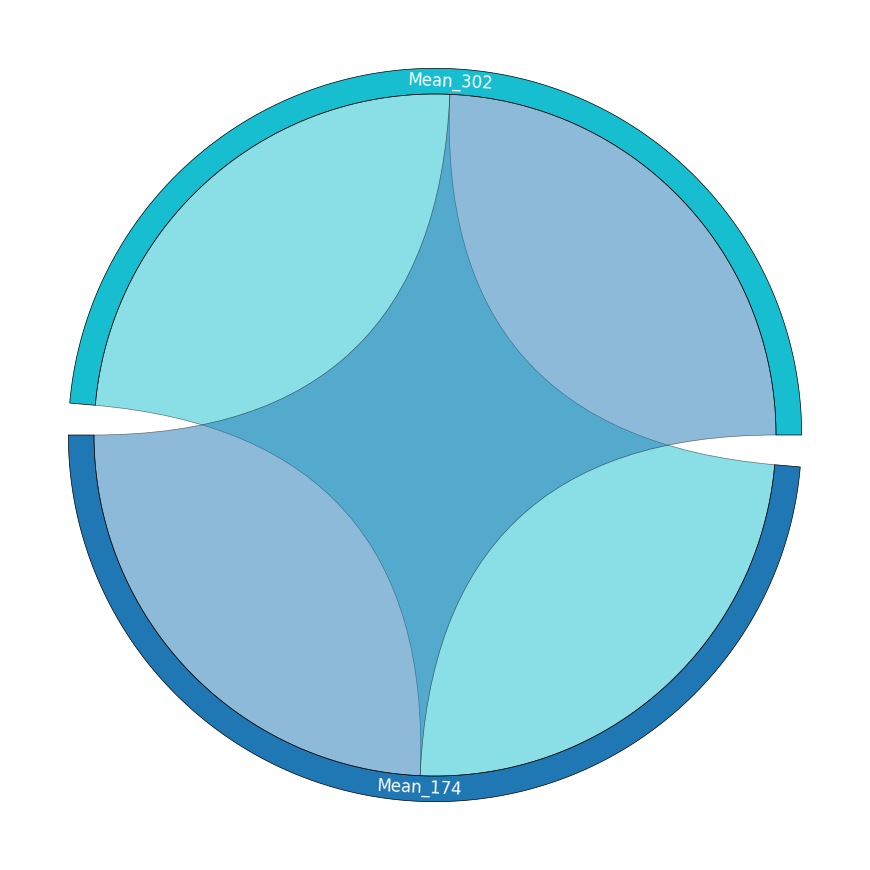

In [ ]:
# Extract pairs from significant columns
# List of edges

edges = [given_name2orginal_name(name) for name in significant_columns]
nodes_with_edges = set([node for edge in edges for node in edge])
nodes = list(nodes_with_edges)
matrix_df = pd.DataFrame(0, index=nodes, columns=nodes)

# Fill the matrix with edge data
for i, edge in enumerate(edges):
    node1, node2 = edge
    matrix_df.at[node1, node2] += diff[i]
    matrix_df.at[node2, node1] += diff[i]  # If undirected

# Initialize Circos plot from the matrix
circos = Circos.initialize_from_matrix(
    matrix_df,
    start=-265,
    end=95,
    space=5,
    r_lim=(93, 100),
    cmap="tab10",
    label_kws=dict(r=94, size=12, color="white"),
    link_kws=dict(ec="black", lw=0.5),
)

# Plot the Circos plot
fig = circos.plotfig()
plt.show()

# cosine

In [ ]:
df_cosine = pd.read_csv("/content/drive/MyDrive/DM_project2/full_cosine_similarity.csv")

In [ ]:
df_educian["DX Binary"] = df_educian["DX"].apply(lambda x: 0 if x==0 else 1)
#Compute the mean of each Value_i column for each group.
means_1 = df_1[value_columns].mean()
means_0 = df_0[value_columns].mean()
significant_columns=[]
diff = []
for col in value_columns:
    if means_1[col] > means_0[col]:
      t_stat, p_value = ttest_ind(df_1[col].dropna(), df_0[col].dropna())
      if p_value < 0.05:
          diff.append(means_1[col]-means_0[col])
          significant_columns.append(col)

print("Significant columns with higher mean")
print(significant_columns)

Significant columns with higher mean
['Value_43201']


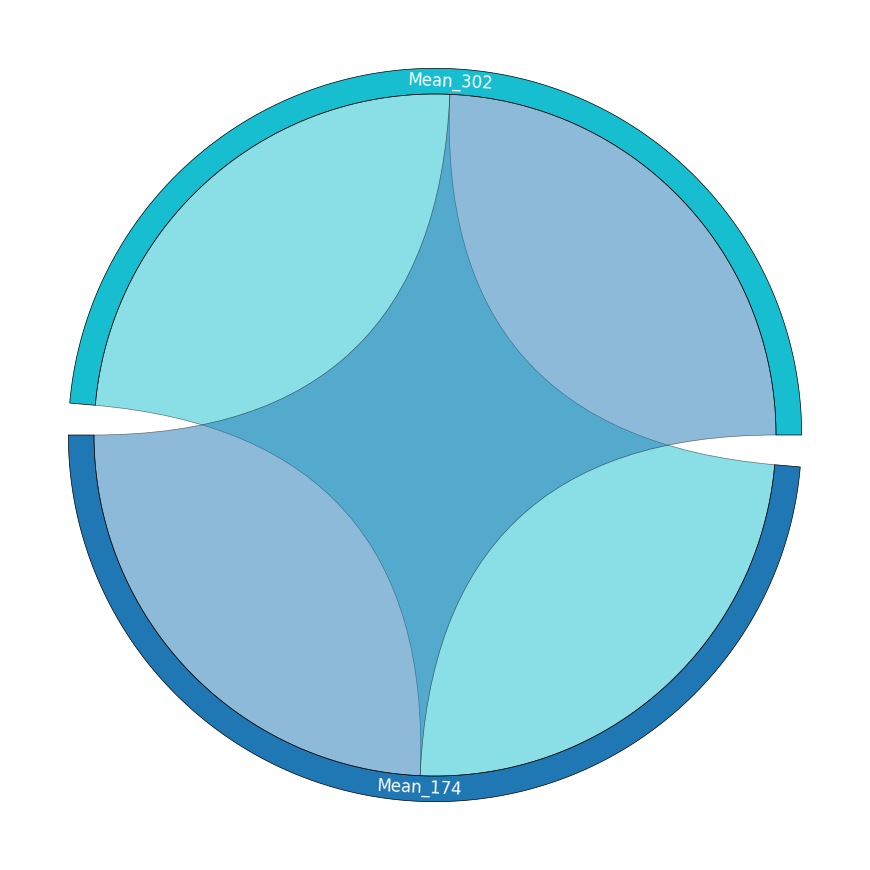

In [ ]:
# Extract pairs from significant columns
# List of edges

edges = [given_name2orginal_name(name) for name in significant_columns]
nodes_with_edges = set([node for edge in edges for node in edge])
nodes = list(nodes_with_edges)
matrix_df = pd.DataFrame(0, index=nodes, columns=nodes)

# Fill the matrix with edge data
for i, edge in enumerate(edges):
    node1, node2 = edge
    matrix_df.at[node1, node2] += diff[i]
    matrix_df.at[node2, node1] += diff[i]  # If undirected

# Initialize Circos plot from the matrix
circos = Circos.initialize_from_matrix(
    matrix_df,
    start=-265,
    end=95,
    space=5,
    r_lim=(93, 100),
    cmap="tab10",
    label_kws=dict(r=94, size=12, color="white"),
    link_kws=dict(ec="black", lw=0.5),
)

# Plot the Circos plot
fig = circos.plotfig()
plt.show()